In [ ]:
from google.colab import files
upload=files.upload()


In [ ]:
import numpy as np
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
reddit_df = pd.read_pickle("redditDataset.pkl")
reddit_df

,text,subreddit
0,that sounds like the answer of a man who does ...,humor
1,i always wonder what people get out of reposti...,humor
2,fuck that downvote them for stalking you in t...,humor
3,seeing as how much this has been around and a...,humor
4,it took me a while to even get my legally requ...,humor
...,...,...
99995,probably because it should nt be anyone else s...,news
99996,of course i do the sole responsibility of the ...,news
99997,its also just unwise if they block his pick lo...,news
99998,another holographic storage for us to hear a...,news


In [ ]:
rdf=reddit_df.drop_duplicates()
rdf

,text,subreddit
0,that sounds like the answer of a man who does ...,humor
1,i always wonder what people get out of reposti...,humor
2,fuck that downvote them for stalking you in t...,humor
3,seeing as how much this has been around and a...,humor
4,it took me a while to even get my legally requ...,humor
...,...,...
76082,i would recommend anyone looking for a more de...,news
76263,so much innuendo so little facts why so coy i...,news
80398,well mlk was black and bernie is white also ...,news
81034,a man intentionally kills animals and gets 50 ...,news


In [ ]:
comm=rdf["text"]
categ=rdf["subreddit"]
humourcomment=[]
newscomment=[]
for i in rdf.index:
  if rdf["subreddit"][i]=="humor":
    humourcomment.append(rdf["text"][i])
  if rdf["subreddit"][i]=="news":
    newscomment.append(rdf["text"][i])

print(len(newscomment))
print(len(humourcomment))

2178
1473


In [ ]:
polhu=[]
subhu=[]
polne=[]
subne=[]
from textblob import TextBlob
for i in humourcomment:
  pands=TextBlob(i)
  ke=pands.sentiment
  polhu.append(ke[0])
  subhu.append(ke[1])
 
for i in newscomment:
  pands=TextBlob(i)
  ke=pands.sentiment
  polne.append(ke[0])
  subne.append(ke[1])


In [ ]:
import matplotlib.pyplot as plt
import collections

import seaborn as sns
def countarr(polhu,titles):

  coupol = collections.Counter(polhu)

  cd=dict(coupol)
  pol=list(cd.keys())
  count=list(cd.values())
  %matplotlib inline
  plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
  x = polhu
  plt.hist(x, bins=50)
  plt.gca().set(title=titles, ylabel='Frequency');
  #fig,ax = plt.subplots(figsize=(10, 10))
  #all_plot=sns.barplot(x=pol,y=count,ax=ax)
  
  #plt.rcParams['font.size'] = '10'

  #plt.xticks(rotation=30);
  


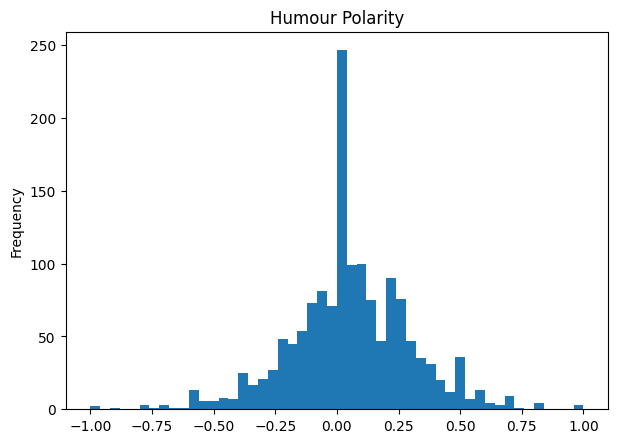

In [ ]:
countarr(polhu,"Humour Polarity")


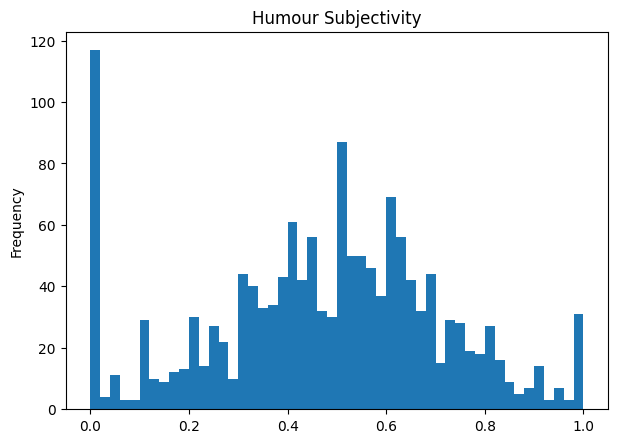

In [ ]:
countarr(subhu,"Humour Subjectivity")

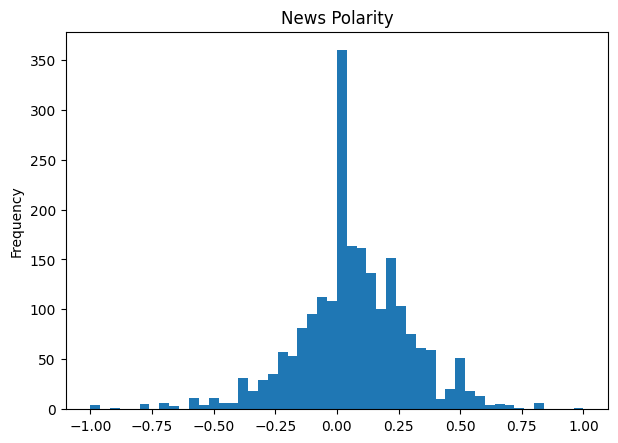

In [ ]:
countarr(polne,"News Polarity")

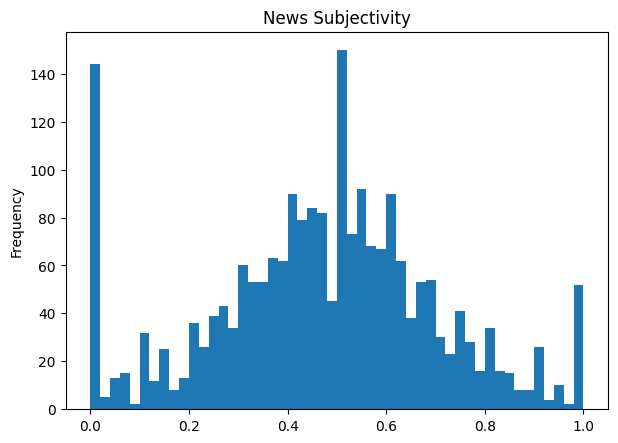

In [ ]:
countarr(subne,"News Subjectivity")

In [ ]:
print("humour polarity")
print("mean")
print(np.mean(polhu))
print("Standard deviation")
print(np.std(polhu))
print("humour subjective")
print("mean")
print(np.mean(subhu))
print("Standard deviation")
print(np.std(subhu))
print("news polarity")
print("mean")
print(np.mean(polne))
print("Standard deviation")
print(np.std(polne))
print("news subjective")
print("mean")
print(np.mean(subne))
print("Standard deviation")
print(np.std(subne))


humour polarity
mean
0.05158728575619279
Standard deviation
0.24866391452327927
humour subjective
mean
0.47140332998753287
Standard deviation
0.24269324821277793
news polarity
mean
0.064048534801197
Standard deviation
0.23041556585535447
news subjective
mean
0.4704749753548112
Standard deviation
0.23274569397299044


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
from string import punctuation
special=set(punctuation)
def filter(comm):
  
  stp=list(stopwords)
  stp.append("make")
  stp.append("will")
  stp.append("people")
  stp.append("someone")
  stp.append("going")
  stp.append("know")

  filtercomm=[]
  for i in comm:

    lk=word_tokenize(i)
    lk
    filter=[]
    for wor in lk:
      if wor.lower() not in stp and wor not in special:
        if len(wor)>3:
          filter.append(wor)
    em=""
    filtercomm.append(filter)
  filtercomm
  filtercomm=[[' '.join(i)] for i in filtercomm]
  filtercomm
  filteredcomm=[]
  for i in filtercomm:
    filteredcomm.append(i[0])
  return filteredcomm

In [ ]:
humourcomment=filter(humourcomment)
newscomment=filter(newscomment)

In [ ]:

hustring=""
unihu=nltk.FreqDist(word_tokenize(hustring.join(humourcomment)))


In [ ]:

tenunihu=unihu.most_common(10)

cd=dict(tenunihu)
pol=list(cd.keys())
count=list(cd.values())
cd

{'back': 67,
 'even': 77,
 'fuck': 67,
 'never': 74,
 'really': 76,
 'shit': 70,
 'something': 65,
 'think': 72,
 'time': 121,
 'work': 71}

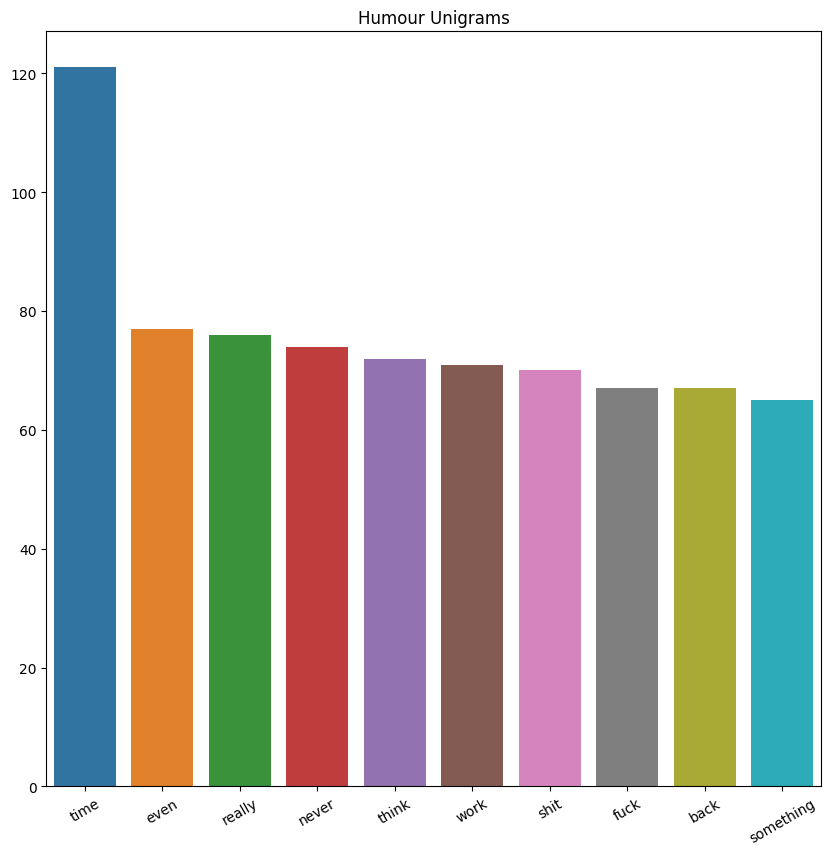

In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=pol,y=count,ax=ax)
ax.set_title('Humour Unigrams')
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

Section 1 Q1 b)- i) News unigrams

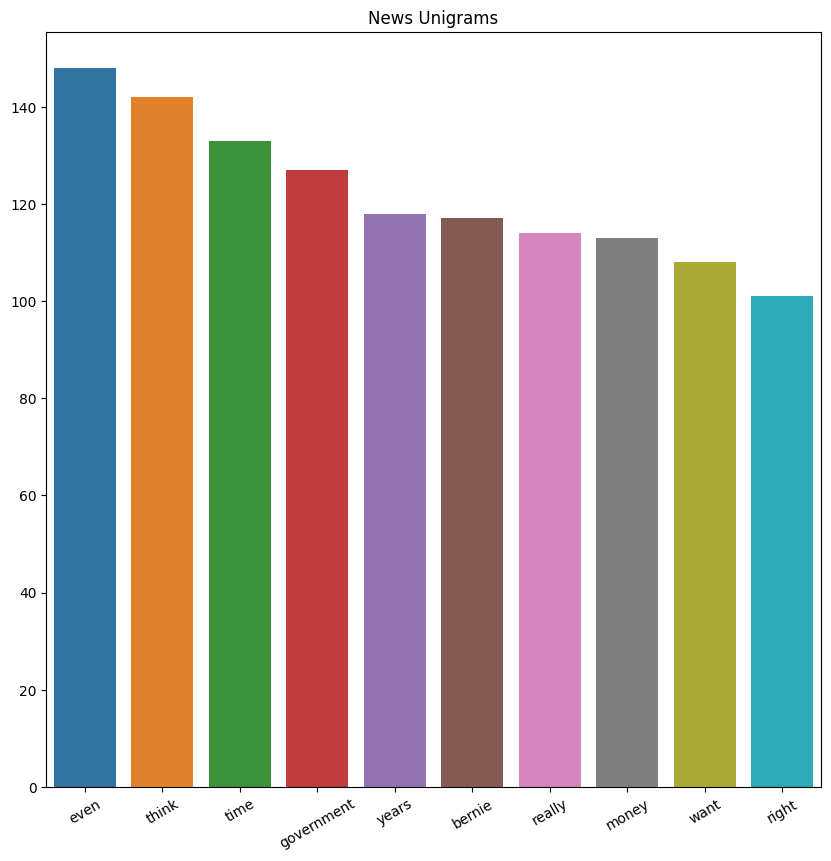

In [ ]:
nestring=""

uninew=nltk.FreqDist(word_tokenize(hustring.join(newscomment)))
uninew=uninew.most_common(10)
cd=dict(uninew)
pol=list(cd.keys())
count=list(cd.values())
cd
fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=pol,y=count,ax=ax)
ax.set_title('News Unigrams')
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

In [ ]:
from nltk.collocations import *
bi_meas=nltk.collocations.BigramAssocMeasures()
hustring=""
bihu=nltk.bigrams(word_tokenize(hustring.join(humourcomment)))
bihucou=nltk.FreqDist(bihu)
bihucou=bihucou.most_common(10)
cd=dict(bihucou)
pol=list(cd.keys())
count=list(cd.values())
bistr=[]
for i in pol:
  re=i[0]+"  "+i[1]
  bistr.append(re)
bistr

['every  time',
 'meme  says',
 'says  case',
 'case  blocked',
 'blocked  schoolwork',
 'schoolwork  unavailable',
 'unavailable  reason',
 'post  title',
 'original  link',
 'meme  template']

Section 1 Q1 b)- ii) Humour Bigram

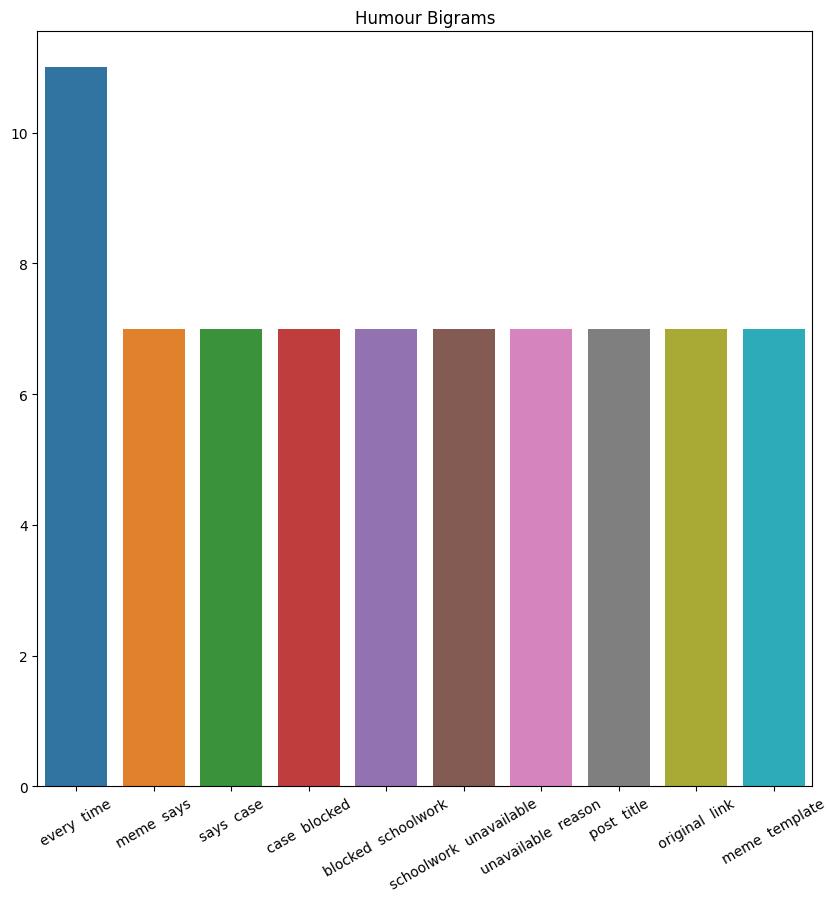

In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=bistr,y=count,ax=ax)
ax.set_title('Humour Bigrams')
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

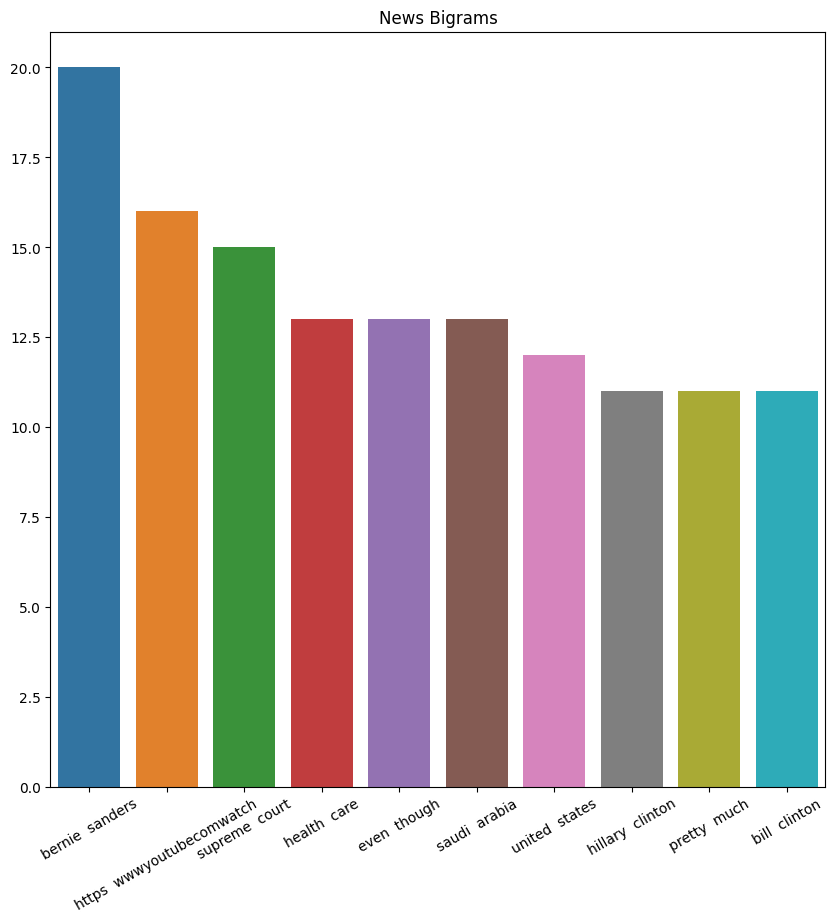

In [ ]:
bi_meas=nltk.collocations.BigramAssocMeasures()
hustring=""
bihu=nltk.bigrams(word_tokenize(hustring.join(newscomment)))
bihucou=nltk.FreqDist(bihu)
bihucou=bihucou.most_common(10)
cd=dict(bihucou)
pol=list(cd.keys())
count=list(cd.values())
bistr=[]
for i in pol:
  re=i[0]+"  "+i[1]
  bistr.append(re)
bistr
fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=bistr,y=count,ax=ax)
ax.set_title('News Bigrams') 
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
from string import punctuation
special=set(punctuation)


In [ ]:
def prepros(comm):
  filtercomm=[]
  for i in comm:

    lk=word_tokenize(i)
    lk
    filter=[]
    for wor in lk:
      if wor.lower() not in stopwords and wor not in special:
        filter.append(wor.lower())
    em=""
    filtercomm.append(filter)
    filtercomm
    filtercomm=[[' '.join(i)] for i in filtercomm]
  filtercomm
  filteredcomm=[]
  for i in filtercomm:
    filteredcomm.append(i[0])
  return filteredcomm


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     comm, categ, test_size=0.30, random_state=42)
X_train


366      islam is a religion of peace there s a piece o...
4094     balance sheet is not the only one the matters ...
51193    sanders campaign playing down their chances in...
418      i just imagine a little kid yelling  mommy   r...
54761    the thing about secondary labor markets  drugs...
                               ...                        
2145     where i live the local hunting club would be a...
3085     that  s not really how we operate we need to d...
1285     totally understand  in my old restaurant we ha...
55936    gt  kiribati has turned to the united arab emi...
53348    on the peninsula  most kids are raised by nann...
Name: text, Length: 2555, dtype: object

In [ ]:
X_trainpre=prepros(X_train)
X_testpre=prepros(X_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer=CountVectorizer()

In [ ]:
X_trainm=vectorizer.fit_transform(X_trainpre)


In [ ]:
X_testm=vectorizer.transform(X_testpre)

In [ ]:
vectorizer.vocabulary_

{'islam': 5103,
 'religion': 7837,
 'peace': 6863,
 'piece': 7003,
 'balance': 975,
 'sheet': 8508,
 'one': 6595,
 'matters': 5877,
 'early': 3071,
 'life': 5556,
 'statement': 8999,
 'cash': 1625,
 'flows': 3780,
 'sanders': 8239,
 'campaign': 1534,
 'playing': 7066,
 'chances': 1702,
 'nevada': 6345,
 'know': 5332,
 're': 7651,
 'going': 4144,
 'win': 10399,
 'got': 4168,
 'karl': 5254,
 'rove': 8149,
 'spending': 8882,
 'money': 6123,
 'anticlinton': 654,
 'ads': 413,
 'republicans': 7930,
 'taking': 9325,
 'advantage': 421,
 'loophole': 5666,
 'allows': 547,
 'vote': 10203,
 'democrats': 2634,
 'caucus': 1640,
 'republican': 7929,
 'ones': 6598,
 'later': 5403,
 'week': 10319,
 'gon': 4152,
 'na': 6242,
 'lock': 5638,
 'imagine': 4770,
 'little': 5611,
 'kid': 5291,
 'yelling': 10612,
 'mommy': 6116,
 'repeatedly': 7895,
 'mother': 6164,
 'ca': 1502,
 'nt': 6463,
 'stand': 8967,
 'anymore': 672,
 'winds': 10403,
 'says': 8274,
 'whatttttt': 10356,
 'matter': 5875,
 'keeps': 5266,
 

Section 1 Q2 b)-

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(X_trainm,y_train)
y_pred = logreg.predict(X_testm) 


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, plot_confusion_matrix,precision_recall_fscore_support
accuracy_score(y_test, y_pred)

0.7791970802919708

In [ ]:
import pickle
filename = 'save_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

Section 1 Q2 c)-

In [ ]:
load_model = pickle.load(open(filename, 'rb'))
res = load_model.score(X_testm, y_test)
print("Accuracy")
res

Accuracy


0.7791970802919708

In [ ]:
pred_test = logreg.predict(X_testm)
print("precision          recall           fscore           support")
precision_recall_fscore_support(y_test, pred_test, average='macro')

precision          recall           fscore           support


(0.7781769512538743, 0.7681578661451542, 0.7712728527078304, None)

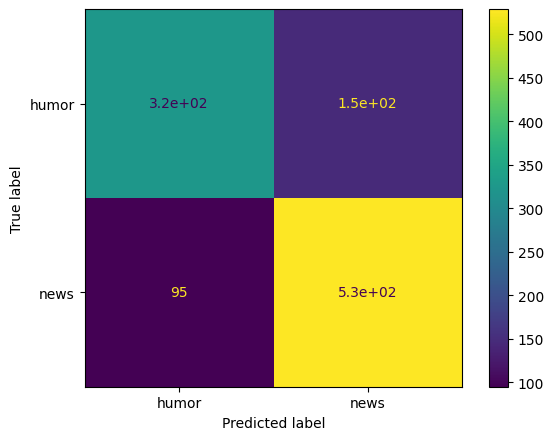

In [ ]:

plot_confusion_matrix(logreg, X_testm, y_test)  
plt.show()  

Section 1 Q2 d)-

In [ ]:
y_test=list(y_test)
y_pred=list(y_pred)
X_test=list(X_test)


In [ ]:
wrongcomm=[]
rightcomm=[]
predw=[]
predr=[]
for i in range(0,len(y_test)):
  if y_pred[i]!=y_test[i]:
    wrongcomm.append(X_test[i])
    predw.append(y_pred[i])

  else:
    rightcomm.append(X_test[i])
    predr.append(y_test[i])

len(wrongcomm)

242

In [ ]:
predw[0:5]

['news', 'news', 'humor', 'humor', 'humor']

In [ ]:
wrongcomm[0:5]

['it s like my grandma always used to say   watching deadpool is better than anal now hit this blunt  you fucking pussy  naturally  she supports bernie sanders ',
 'd e a d p o o l e a d p o o l d a d p o o l d e d p o o l d e a p o o l d e a d o o l d e a d p o l d e a d p o l d e a d p o o d e a d p o o l s a n d e r s',
 'i think it is pretty hilarious that this is being referred to as a  conservative seat  on the scotus that s not actually how that works ',
 'she ll be jailed only if there are other factions with enough sway that want to see her jailed it s looking like the intelligence  faction wants that i m holding out hope jailing her wo nt really change much in and of itself  but it s a nice dream ',
 'jesus christ i ca nt think of a better thumbnail than that for this post he s like  i m just saying you know ']

In [ ]:
predr[0:5]


['humor', 'news', 'news', 'news', 'humor']

In [ ]:
rightcomm[0:5]

['holy fuck nuggets this david wolfe bastard again all the older women i work with share his asinine propaganda all over facebook  it consumes me with a special kind of hatred ',
 'it s fun that the government has turned the words freedom and patriot in to code words for tyrannical  and selfish ',
 'this is a much bigger deal than it would appear  access to modern tech and resources could spark a boom in a country that is in desperate need of infrastructure  that is known for the industrious nature of its workers and that has massively depressed labor costs it could be great for cuba and the north american economies ',
 'sounds like a poorly thought out idea do nt give control to random accounts  either find more mods to help or keep it the way it is ',
 'i m sorry to say but you re an idiot and this is actually your fault you did nt feel appreciated for months so you went way over the top on valentine s day  that s on you reading about your valentine s day stunt made me feel nauseated

Section 2

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
id1="1oSQ6GmDHVpRRiS1ztINo1UGiBy7zNOfx"
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('User.txt') 



In [ ]:
import pandas as pd

df1 = pd.read_csv('User.txt', delimiter = "\t",header=None)
df1


,0,1,2,3,4
0,0,2010-10-17T01:48:53Z,39.747652,-104.992510,88c46bf20db295831bd2d1718ad7e6f5
1,0,2010-10-16T06:02:04Z,39.891383,-105.070814,7a0f88982aa015062b95e3b4843f9ca2
2,0,2010-10-16T03:48:54Z,39.891077,-105.068532,dd7cd3d264c2d063832db506fba8bf79
3,0,2010-10-14T18:25:51Z,39.750469,-104.999073,9848afcc62e500a01cf6fbf24b797732f8963683
4,0,2010-10-14T00:21:47Z,39.752713,-104.996337,2ef143e12038c870038df53e0478cefc
...,...,...,...,...,...
4747282,58222,2009-01-23T02:30:34Z,33.833333,35.833333,9f6b83bca22411dd85460384f67fcdb0
4747283,58224,2009-01-03T15:06:54Z,33.833333,35.833333,9f6b83bca22411dd85460384f67fcdb0
4747284,58225,2009-01-20T13:58:14Z,33.833333,35.833333,9f6b83bca22411dd85460384f67fcdb0
4747285,58226,2009-01-20T13:30:09Z,33.833333,35.833333,9f6b83bca22411dd85460384f67fcdb0


In [ ]:
!pip install folium

In [ ]:
locid=df1[4]
import collections
loccou = collections.Counter(locid)
loccou=loccou.most_common(201)
loccou=loccou[1:]
locc=dict(loccou)
loc=list(locc.keys())
count=list(locc.values())


Section 2 Q1 a)- Location Plot

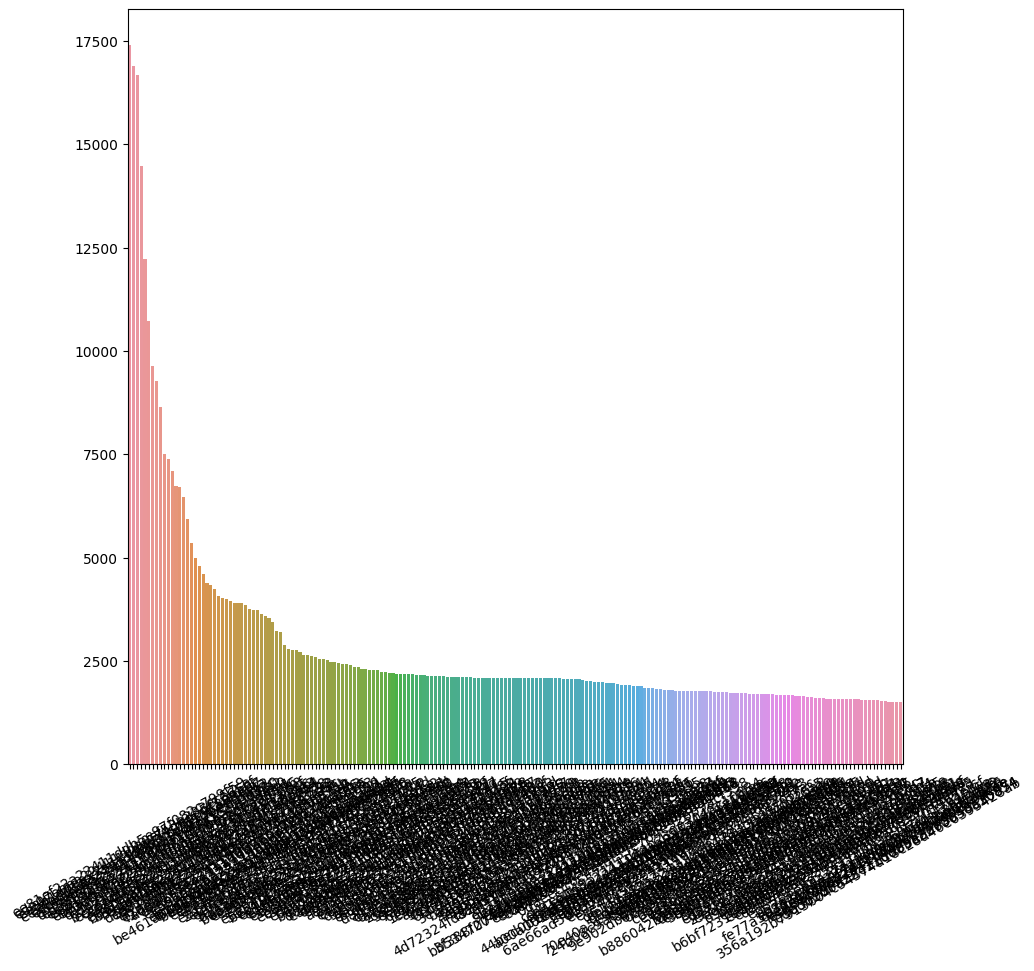

In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=loc,y=count,ax=ax)
  
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

In [ ]:
useid=df1[0]
useid[0:2500]
locid=df1[0]
loccou = collections.Counter(useid)


locc=dict(loccou)
loc=list(locc.keys())
count=list(locc.values())
len(locc)

51406

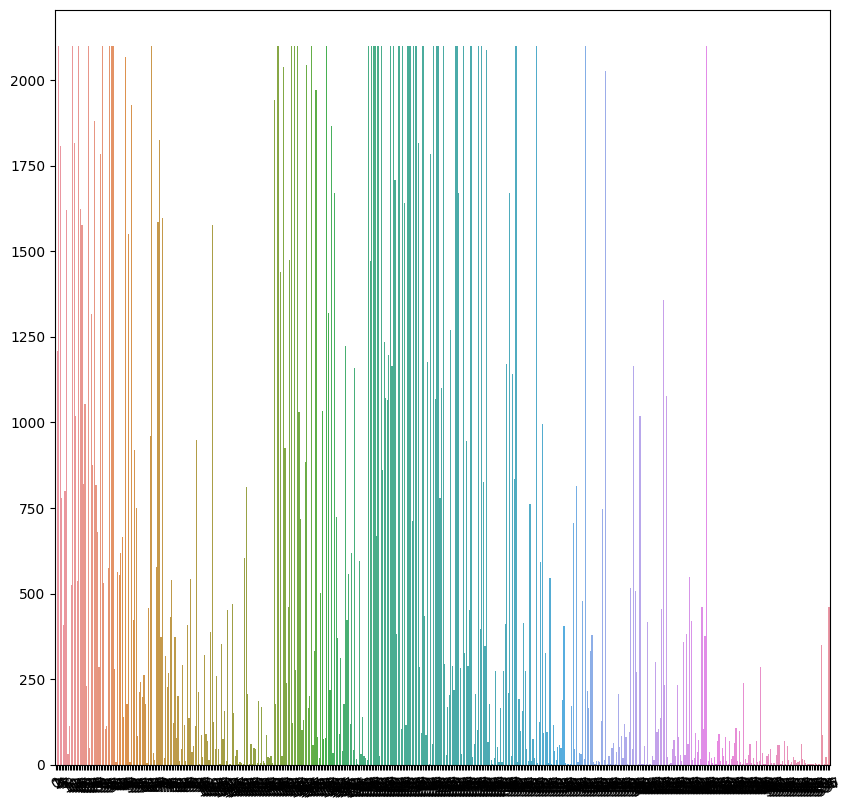

In [ ]:



loc=loc[0:500]
count=count[0:500]
fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=loc,y=count,ax=ax)
  
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

In [ ]:
import folium
from folium import plugins

mp = folium.Map([39.747652, -104.992510],zoom_start=3)
dftem=df1[[2, 3]]
dfpem=dftem.dropna()
stationArr = dfpem[[2, 3]].to_numpy()
mp.add_child(plugins.HeatMap(stationArr, radius=12))
mp.save("img.html")

In [ ]:
allusers=df1[4]
loccou = collections.Counter(useid)
locc=dict(loccou.most_common(10))

loc=list(locc.keys())
count=list(locc.values())
locc
res = list(locc.keys())[0] 
res

0

In [ ]:
import datetime 

dtf=[]
for i in df1.index:
  if df1[0][i]==res:
    k1=str(df1[1][i])
    dts=datetime.datetime.strptime(k1,"%Y-%m-%dT%H:%M:%SZ")
    
    dtf.append(dts.date())

dtf.sort


<function list.sort>

In [ ]:
dtfcou=collections.Counter(dtf)
dtfcoudic=dict(dtfcou)
datee=list(dtfcoudic.keys())
dcount=list(dtfcoudic.values())
dcount
import plotly.express as px
pdf = pd.DataFrame(list(zip(datee, dcount)), 
               columns =['Date', 'Count'])
fig = px.line(pdf, x='Date', y="Count")
fig.show()


In [ ]:
allusers=df1[4]
loccou = collections.Counter(allusers)
locc=dict(loccou.most_common(10))

loc=list(locc.keys())
count=list(locc.values())
locc
res = list(locc.keys())[1] 
res

dtf=[]
for i in df1.index:
  if df1[4][i]==res:
    k1=str(df1[1][i])
    dts=datetime.datetime.strptime(k1,"%Y-%m-%dT%H:%M:%SZ")
    dtf.append(dts.date())



dtf.sort()
dtf
dtfcou=collections.Counter(dtf)
dtfcoudic=dict(dtfcou)
datee=list(dtfcoudic.keys())
dcount=list(dtfcoudic.values())
dcount
import plotly.express as px
pdf = pd.DataFrame(list(zip(datee, dcount)), 
               columns =['Date', 'Count'])
fig = px.line(pdf, x='Date', y="Count")
fig.show()

Section 3

In [ ]:
from google.colab import files
upload=files.upload()


Saving IdentityResolution.csv to IdentityResolution (1).csv


In [ ]:
iddf = pd.read_csv('IdentityResolution.csv',header=None)
iddf

,0,1,2,3
0,Alain Stephan Domnguez Lucas,https://www.twitter.com/alainstephan,http://www.facebook.com/alainpato,http://instagram.com/alainstephan
1,Alex Sablan,https://www.twitter.com/AlexSablancom,https://facebook.com/alexsablancom,http://instagram.com/a_sablan
2,Xavier Gass,https://www.twitter.com/XaviGasso,http://www.facebook.com/xgasso,http://instagram.com/xavigasso
3,Nicole Lapin,https://www.twitter.com/NicoleLapin,http://www.facebook.com/nicolelapin,http://instagram.com/nicolelapin
4,Mattan Griffel,https://www.twitter.com/mattangriffel,http://www.facebook.com/mattangriffel,http://instagram.com/mattangriffel
...,...,...,...,...
319,Vasu Chawla,https://twitter.com/VasuChawla,https://facebook.com/vasuchawla26,https://instagram.com/vasuchawla
320,Dayn Wilberding,http://www.twitter.com/dayn,http://www.facebook.com/daynw,http://instagram.com/dayn
321,Guillermo Navarro,https://www.twitter.com/bildenlex,https://www.facebook.com/DRGUILLERMONAVARRO,http://instagram.com/bildenlex
322,Antonio J. Cuevas,https://www.twitter.com/Zeroneuronas,http://www.facebook.com/antonio.j.cuevas,http://instagram.com/zeroneuronas


In [ ]:
!pip install textdistance

In [ ]:
import textdistance
fbuser=[]
instauser=[]
twituser=[]
uname=[]
for i in iddf.index:
  uname.append(iddf[0][i])
  li=iddf[1][i].rfind("/")
  te=iddf[1][i]
  twituser.append(te[li+1:])
  li=iddf[2][i].rfind("/")
  te=iddf[2][i]
  fbuser.append(te[li+1:])
  li=iddf[3][i].rfind("/")
  te=iddf[3][i]
  instauser.append(te[li+1:])


In [ ]:
twifbjaro=[]
for i in range(0,len(uname)):
  twifbjaro.append(textdistance.jaro_winkler(twituser[i],fbuser[i]))



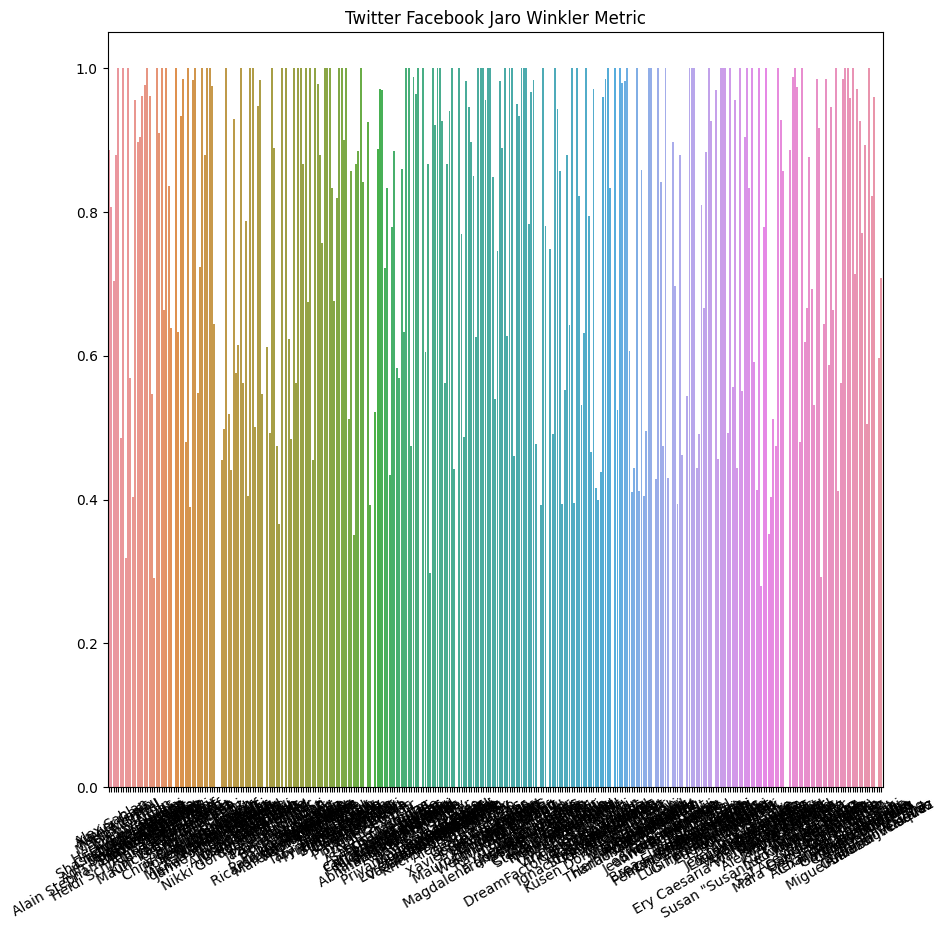

In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=uname,y=twifbjaro,ax=ax)
ax.set_title('Twitter Facebook Jaro Winkler Metric')
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

In [ ]:


twifblevi=[]
for i in range(0,len(uname)):
  twifblevi.append(textdistance.levenshtein.normalized_similarity(twituser[i],fbuser[i]))


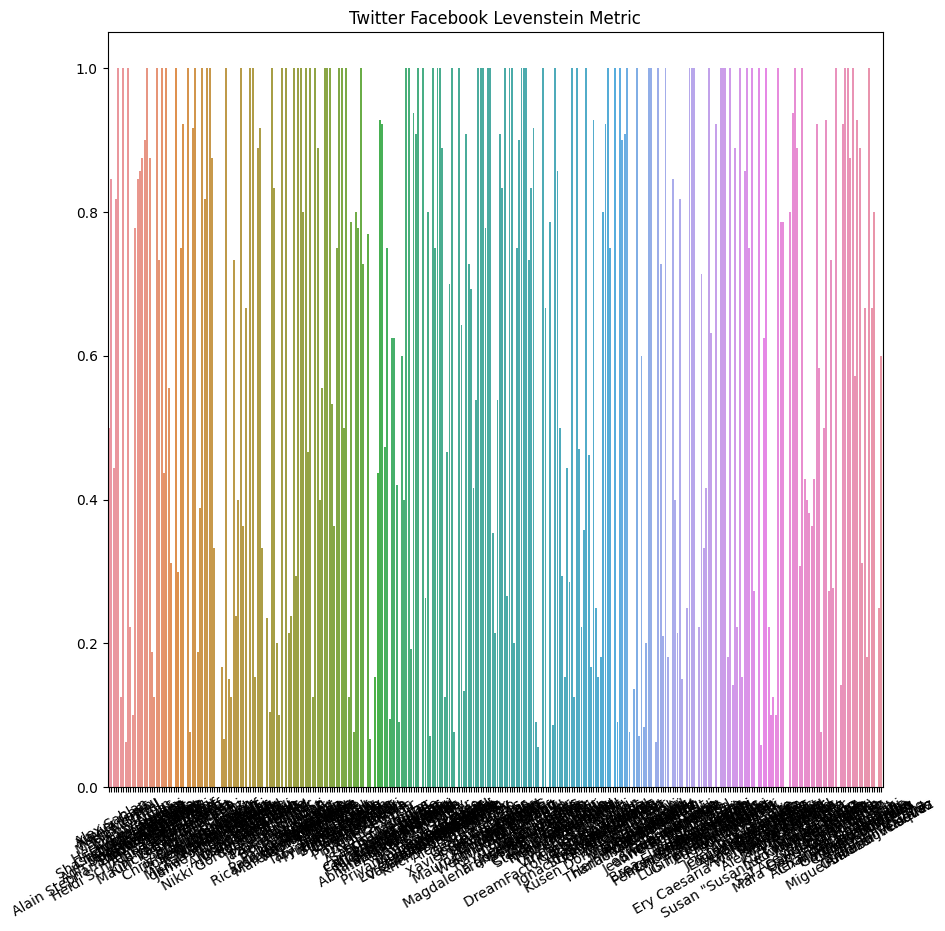

In [ ]:

fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=uname,y=twifblevi,ax=ax)
ax.set_title('Twitter Facebook Levenstein Metric')  
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

In [ ]:
instfbjaro=[]
for i in range(0,len(uname)):
  instfbjaro.append(textdistance.jaro_winkler(instauser[i],fbuser[i]))


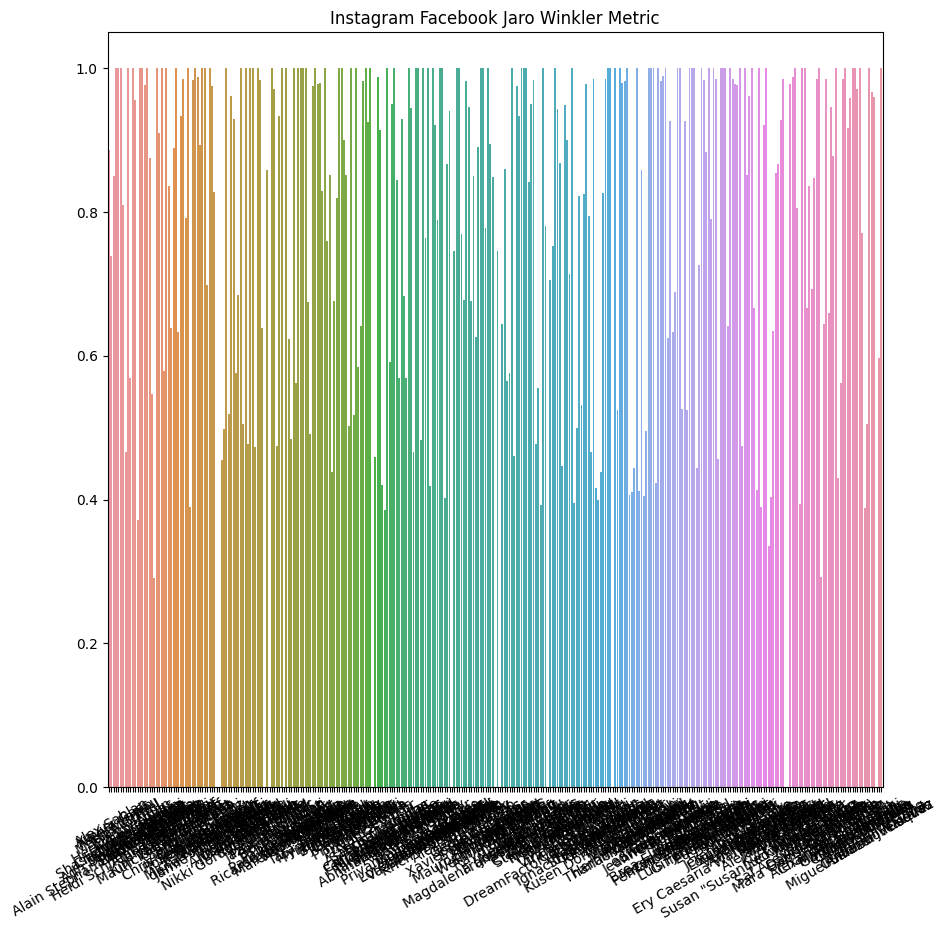

In [ ]:

fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=uname,y=instfbjaro,ax=ax)
ax.set_title('Instagram Facebook Jaro Winkler Metric')
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

In [ ]:
instafblev=[]
for i in range(0,len(uname)):
  instafblev.append((textdistance.levenshtein.normalized_similarity(instauser[i],fbuser[i])))


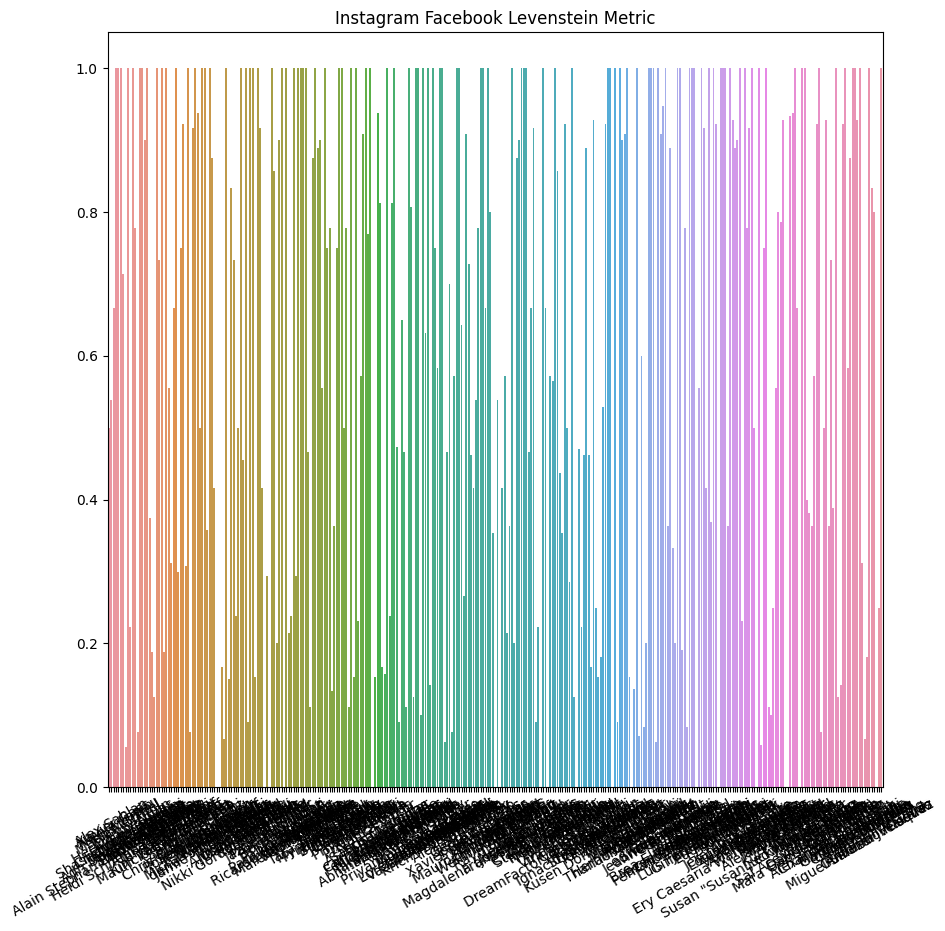

In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=uname,y=instafblev,ax=ax)
ax.set_title('Instagram Facebook Levenstein Metric') 
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

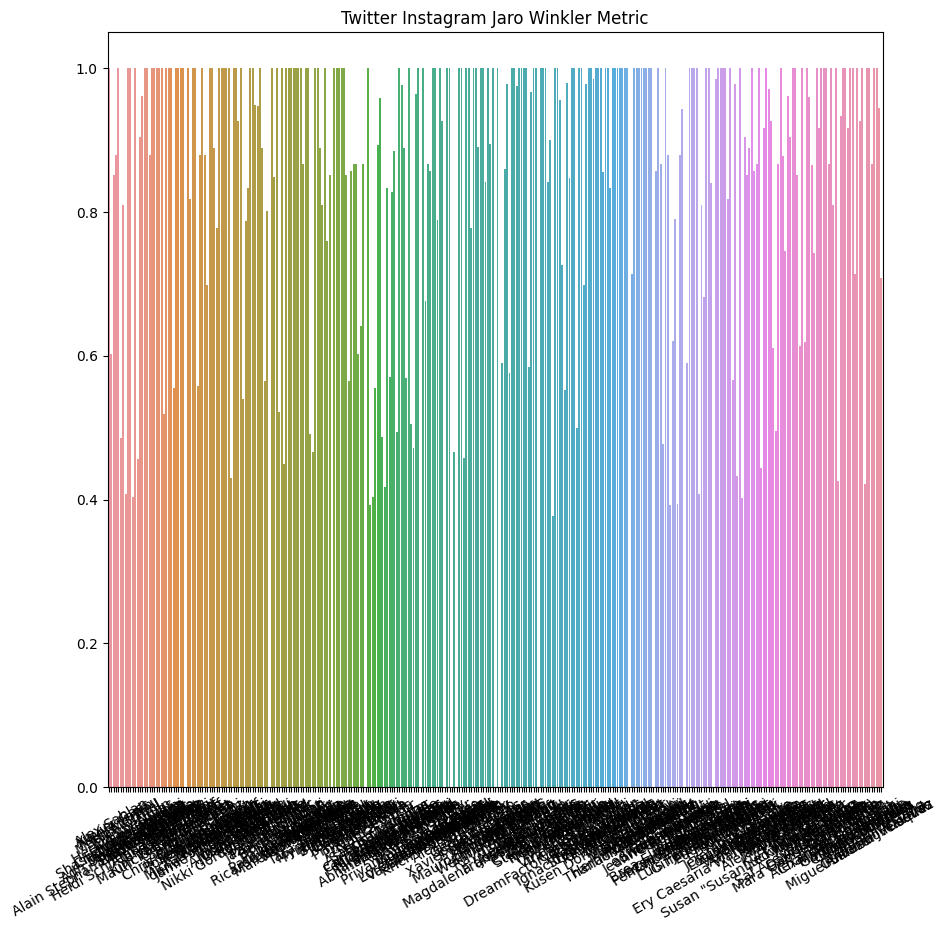

In [ ]:
twiinstajaro=[]
for i in range(0,len(uname)):
  twiinstajaro.append(textdistance.jaro_winkler(instauser[i],twituser[i]))
twiinstajaro

fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=uname,y=twiinstajaro,ax=ax)
ax.set_title('Twitter Instagram Jaro Winkler Metric') 
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);

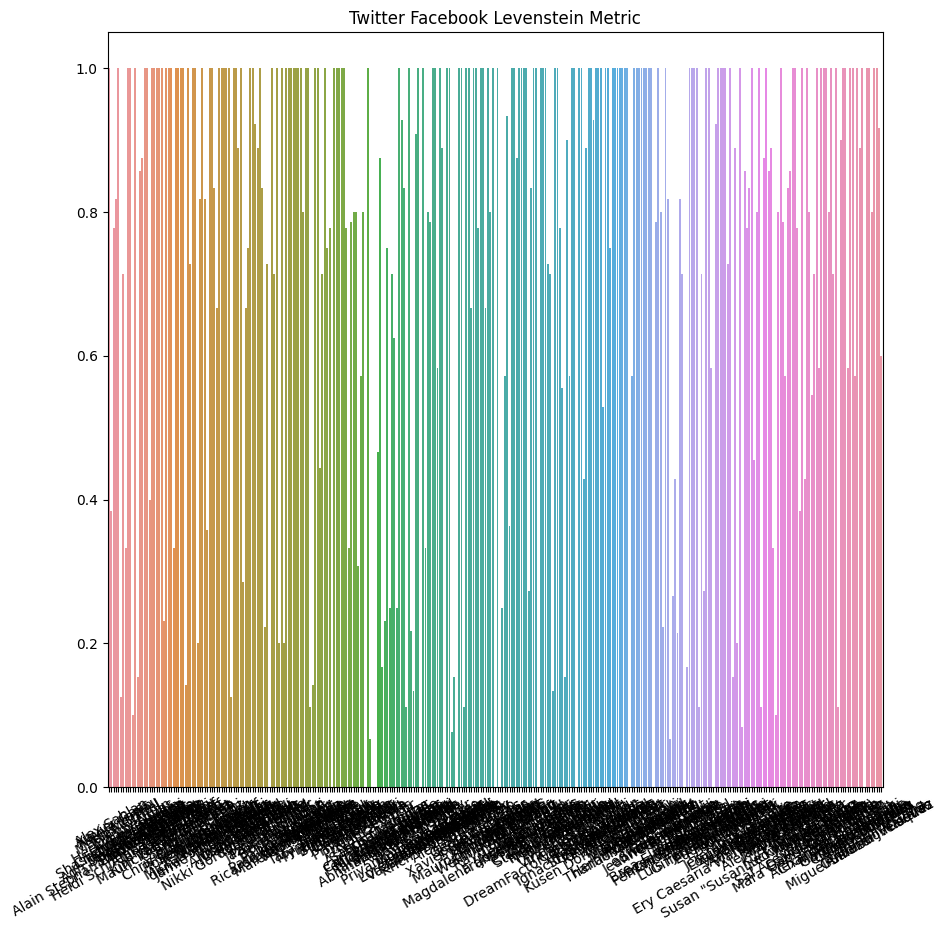

In [ ]:
twiinstalev=[]
for i in range(0,len(uname)):
  twiinstalev.append((textdistance.levenshtein.normalized_similarity(instauser[i],twituser[i])))
twiinstalev
fig,ax = plt.subplots(figsize=(10, 10))
all_plot=sns.barplot(x=uname,y=twiinstalev,ax=ax)
ax.set_title('Twitter Facebook Levenstein Metric') 
  #plt.rcParams['font.size'] = '10'

plt.xticks(rotation=30);